# 資料載入

In [11]:
import pandas as pd
import os

os.environ['CUDA_VISIBLE_DEVICES'] = ""
row_train = pd.read_csv('data/train.csv')
row_test = pd.read_csv('data/test.csv')

label = row_train['label']
row_train = row_train.drop(columns=['label'])

# 建模

In [12]:
import keras
import numpy as np
from sklearn.model_selection import train_test_split
from keras import layers

# normalized
train_x = row_train/255
test_x = row_test/255
label_vec = pd.get_dummies(label)

train_x_array = train_x.values.reshape(train_x.shape[0],28,28,1)
test_x_array = test_x.values.reshape(test_x.shape[0],28,28,1)
print(train_x_array.shape)
print(test_x_array.shape)

# 分割資料
train_x, val_x, train_y, val_y = train_test_split(train_x_array,label_vec)

layer_list = [layers.Conv2D(50,kernel_size=(5,5),input_shape=(28,28,1),activation='relu'),
              layers.Conv2D(50,kernel_size=(3,3),activation='relu'),
              layers.MaxPool2D(2,2),
              layers.Conv2D(100,kernel_size=(3,3),activation='relu'),
              layers.MaxPool2D(2,2),
              layers.Conv2D(200,kernel_size=(3,3),activation='relu'),
              layers.MaxPool2D(2,2),
              layers.Flatten(),
              layers.Dense(200,activation='relu'),
              layers.Dense(10,activation='softmax')]

model = keras.models.Sequential(layer_list)
model.compile(loss='categorical_crossentropy',
             optimizer=keras.optimizers.Adam(),
             metrics=['accuracy'])

model.summary()
training_process = model.fit(train_x,train_y,
                             epochs=50,
                             batch_size=100,
                             validation_data=(val_x,val_y))


(42000, 28, 28, 1)
(28000, 28, 28, 1)
Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 24, 24, 50)        1300      
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 22, 22, 50)        22550     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 11, 11, 50)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 9, 9, 100)         45100     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 4, 4, 100)         0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 2, 2, 200)         180200    
_________________________________________________________________
max_pooling2d_6 

31500/31500 [==============================] - 5s 146us/step - loss: 4.6243e-06 - accuracy: 1.0000 - val_loss: 0.0595 - val_accuracy: 0.9912
Epoch 45/50
31500/31500 [==============================] - 5s 147us/step - loss: 3.6384e-06 - accuracy: 1.0000 - val_loss: 0.0603 - val_accuracy: 0.9913
Epoch 46/50
31500/31500 [==============================] - 5s 147us/step - loss: 2.9257e-06 - accuracy: 1.0000 - val_loss: 0.0611 - val_accuracy: 0.9914
Epoch 47/50
31500/31500 [==============================] - 5s 147us/step - loss: 2.3551e-06 - accuracy: 1.0000 - val_loss: 0.0619 - val_accuracy: 0.9914
Epoch 48/50
31500/31500 [==============================] - 5s 148us/step - loss: 1.9053e-06 - accuracy: 1.0000 - val_loss: 0.0627 - val_accuracy: 0.9914
Epoch 49/50
31500/31500 [==============================] - 5s 147us/step - loss: 1.5304e-06 - accuracy: 1.0000 - val_loss: 0.0635 - val_accuracy: 0.9915
Epoch 50/50
31500/31500 [==============================] - 5s 146us/step - loss: 1.2569e-06 - 

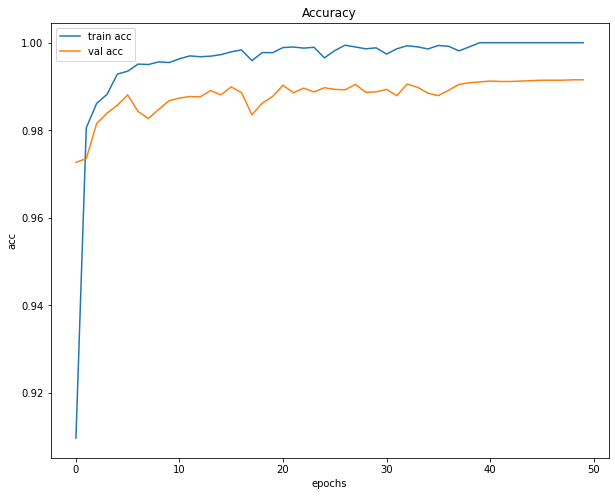

In [13]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,8))
plt.plot(training_process.history['accuracy'],label='train acc')
plt.plot(training_process.history['val_accuracy'],label='val acc')
plt.xlabel('epochs')
plt.ylabel('acc')
plt.title('Accuracy')
plt.legend()
plt.show()

In [14]:

pred = np.argmax(model.predict(test_x_array), axis=1)

index = pd.DataFrame(range(1,test_x.shape[0]+1),columns=['ImageId'])
pred = pd.DataFrame(pred,columns=['Label'])

res_df = pd.concat([index,pred],axis=1)
res_df.to_csv('res.csv',index=False)
